Engy-5140: Chemical and Nuclear Waste Processing Fall 2019 UMass Lowell; Prof. V. F. de Almeida **16Nov2019**

# 05. Gas Absorption/Stripping Sizing Correlations

$
\newcommand{\efacg}{\mathcal{E}_\text{G}}
\newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
\newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
\newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
\newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
$

---

## Table of Contents
* [Objectives](#objectives)
* [Background](#background)
* [Downcomer Weir Length](#weirlength)
---

## Objectives<a id="objectives"></a>

+ Elaborate on empirical correlations useful for non-equilibrium theory.

## Background<a id="background"></a>

+ **Part 1**:
In-class course notes OneNote [Engy-5140-gas-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EqcWsUxiWF5HpZtAui06pSgBIPMNorxebuwNt7Lsr-DMdQ?e=NSm120).

+ **Part 2**:
In-class course notes OneNote [Engy-5140-noneq-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgwN25gp8ytGpdRItJdVRf4B7s_LLH76ODb7f6lSscvMCg?e=LqhrPg).

In [1]:
import scipy.constants as const

const.meter = 1.0

## Downcomer Weir Length<a id="weirlength"></a>

Computing the downcomer weir length parameter. Note that $L_w = D_T\,\sin(\alpha/2)$ and the angle $\alpha$ is computed from solving 

\begin{equation*}
A_d = \frac{1}{2}\,R^2\,\bigl(\alpha - \sin \alpha \bigr)
\end{equation*}

or solving for the $\alpha$ root 

\begin{equation*}
\alpha - \sin \alpha - 2\pi\,\frac{A_d}{A_T} = 0
\end{equation*}

so that $  0< \alpha < \pi$. Since in practice $0.1 <= \frac{A_d}{A_T} <= 0.2$, a table of values of $L_w/D_T$ versus $A_d/A_T$ is the desired result computed below.

In [2]:
'''Function at an array of values'''

import math
import numpy as np

func       = lambda alpha,param: alpha - np.sin(alpha) - param  # alpha must be np.ndarray
func_prime = lambda alpha,param: 1.0 - np.cos(alpha)            # alpha must be np.ndarray

In [3]:
'''Function: plot function'''

def plot_function( alpha_vec, param_vec,
                   alpha_root=None  ):
    
    '''
    Plot function func(alpha).

    Parameters
    ----------
    alpha_vec: numpy.ndarray, required
        Vector of alpha values.
    param_vec: numpy.ndarray, required
        Vector of parameter values.
    
    Returns
    -------
    None

    Examples
    --------
    '''
    
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(6, 6))
    
    for p in param_vec:
        Ad_over_A = p/2/math.pi
        plt.plot(alpha_vec/2/math.pi*360, func(alpha_vec, p),'b-',label='$Ad/A=$%1.2f'%Ad_over_A)
        
    plt.xlabel(r'$\alpha$',fontsize=18)
    plt.ylabel(r'$f(\alpha)$',fontsize=18)
    plt.title(r'Computing the Roots of $f(\alpha)$',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
      
    if alpha_root is not None:
        
        plt.plot(alpha_root/2/math.pi*360, 0.0,'r*',label='root',markersize=14)
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = alpha_root/2/math.pi*360 + dx*0.03
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$x=$%1.2f'%(alpha_root/2/math.pi*360),fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

In [4]:
'''Typical function values in graphical form'''

Ad_over_A = 0.1

param = 2*math.pi * Ad_over_A

alpha_min = 30  / 360 * 2*math.pi
alpha_max = 150 / 360 * 2*math.pi
n_pts = 100
alpha_vec = np.linspace(alpha_min, alpha_max, n_pts)

plot_function( alpha_vec, np.array([param]) )

<Figure size 600x600 with 1 Axes>

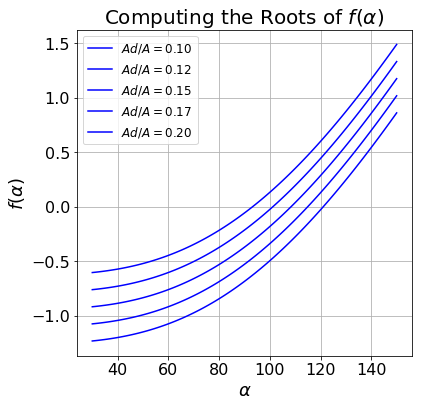

In [5]:
'''Function values for various parameters A_d/A_T'''

param_vec = 2*math.pi * np.linspace(0.1, 0.2, 5)

plot_function( alpha_vec, param_vec )

In [6]:
'''Newton's method for finding root value'''

def newton_solve( alpha_guess=0.0, param=0.0, k_max=30, tolerance=1.0e-10, verbose=True ):

    # Other initialization
    delta_k = 1e+10
    f_k     = 1e+10
    alpha = np.array([alpha_guess])

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(a_k)  |  f'(a_k) | |del a_k| |    a_k   |convg|")
        print('------------------------------------------------------')

    import math
    k = 0
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k       = func( alpha, param )
        f_prime_k = func_prime( alpha, param )
        
        delta_k_old = delta_k
        
        delta_k     = -f_k / f_prime_k
        
        alpha += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k,f_prime_k,abs(delta_k),alpha,convergence_factor))

    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%alpha)
    
    return alpha[0]

In [7]:
'''Find one root: example'''

alpha = 40/360 * 2*math.pi
param = 2*math.pi * Ad_over_A

k_max     = 20
tolerance = 1.0e-8

alpha = newton_solve( alpha, param, k_max, tolerance)

print('Alpha [deg] = %1.3f'%(alpha/2/math.pi*360))



******************************************************
          Newton's Method Iterations                  
******************************************************
k |  f(a_k)  |  f'(a_k) | |del a_k| |    a_k   |convg|
------------------------------------------------------
 1 -5.730e-01 +2.340e-01 +2.449e+00  +3.147e+00  0.00
 2 +2.524e+00 +2.000e+00 +1.262e+00  +1.885e+00  0.26
 3 +3.056e-01 +1.309e+00 +2.334e-01  +1.652e+00 -6.25
 4 +2.645e-02 +1.081e+00 +2.447e-02  +1.627e+00  2.55
 5 +2.987e-04 +1.056e+00 +2.828e-04  +1.627e+00  2.20
 6 +3.993e-08 +1.056e+00 +3.782e-08  +1.627e+00  2.09
 7 +7.772e-16 +1.056e+00 +7.360e-16  +1.627e+00  2.04
******************************************************
Root = 1.62675e+00
Alpha [deg] = 93.206


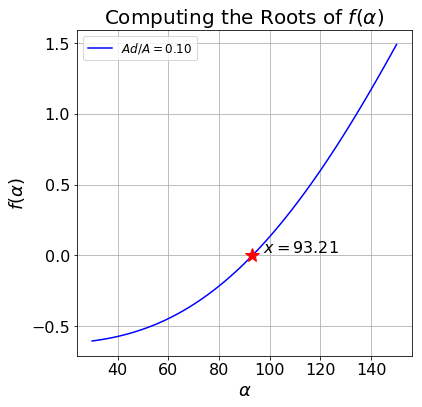

In [8]:
plot_function( alpha_vec, np.array([param]), alpha )

In [9]:
'''Compute Lw'''

radius = 0.81/2.0*const.meter

L_w = 2 * radius * math.sin(alpha/2)

print('Weir length [m] = %1.3f'%(L_w))

Weir length [m] = 0.589


In [10]:
'''Build table of values for weir length Lw as a function of Ad/A'''

alpha = 40/360 * 2*math.pi

Ad_over_A_min = 0.1
Ad_over_A_max = 0.2

param_vec     = 2*math.pi * np.linspace(Ad_over_A_min, Ad_over_A_max, 10)

for p in param_vec:
    
    alpha = newton_solve( alpha, p, k_max=20, tolerance=1e-8, verbose=False)
    
    print('Alpha [deg] = %1.3f  Ad/A = %1.3f  L_w/D = %1.3f'%(alpha/2/math.pi*360, p/2/math.pi,math.sin(alpha/2)))

Alpha [deg] = 93.206  Ad/A = 0.100  L_w/D = 0.727
Alpha [deg] = 96.883  Ad/A = 0.111  L_w/D = 0.748
Alpha [deg] = 100.361  Ad/A = 0.122  L_w/D = 0.768
Alpha [deg] = 103.672  Ad/A = 0.133  L_w/D = 0.786
Alpha [deg] = 106.839  Ad/A = 0.144  L_w/D = 0.803
Alpha [deg] = 109.881  Ad/A = 0.156  L_w/D = 0.819
Alpha [deg] = 112.814  Ad/A = 0.167  L_w/D = 0.833
Alpha [deg] = 115.650  Ad/A = 0.178  L_w/D = 0.846
Alpha [deg] = 118.400  Ad/A = 0.189  L_w/D = 0.859
Alpha [deg] = 121.074  Ad/A = 0.200  L_w/D = 0.871
